## **Sistemas de Recomendación** 
        Por: Manuela Larrea Gómez
        Profesor: Juan de Dios Romero Palop


**Máster en Data Science, Big Data e Inteligencia Artificial - Afi Escuela**

### Ejercicio 1: Recomendador basado en contenidos


Para este ejercicio se usaron los datos: 
* https://datasets.imdbws.com/title.basics.tsv.gz
* https://datasets.imdbws.com/title.ratings.tsv.gz

Y el json resultante del scrapping de la página para obtener las keywords de las peliculas, es una muestra con las siguientes caracteristicas: 
* Películas con puntuación mayor o igual a 8
* Películas con más de 770 votos 

Todos los datos fueron suministrados y almacenados en la carpeta 'datos'.


In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics.pairwise import cosine_similarity

In [2]:
imdb_basics = pd.read_csv("datos/title.basics.tsv", sep="\t")

C:\Users\manu-\AppData\Local\Temp\ipykernel_23056\2151913261.py:1: DtypeWarning: Columns (4) have mixed types. Specify dtype option on import or set low_memory=False.
  imdb_basics = pd.read_csv("datos/title.basics.tsv", sep="\t")


In [3]:
imdb_basics.head(3)

,tconst,titleType,primaryTitle,originalTitle,isAdult,startYear,endYear,runtimeMinutes,genres
0,tt0000001,short,Carmencita,Carmencita,0,1894,\N,1,"Documentary,Short"
1,tt0000002,short,Le clown et ses chiens,Le clown et ses chiens,0,1892,\N,5,"Animation,Short"
2,tt0000003,short,Pauvre Pierrot,Pauvre Pierrot,0,1892,\N,5,"Animation,Comedy,Romance"


In [4]:
imdb_basics.groupby("titleType").tconst.count()

titleType
movie            678435
short            990715
tvEpisode       8202435
tvMiniSeries      53845
tvMovie          145187
tvPilot               1
tvSeries         261544
tvShort           10291
tvSpecial         47337
video            291119
videoGame         38072
Name: tconst, dtype: int64

In [5]:
imdb_basics_pelis = imdb_basics[imdb_basics.titleType == "movie"]

In [6]:
imdb_ratings = pd.read_csv("datos/title.ratings.tsv", sep="\t")

In [7]:
imdb_ratings.head(3)

,tconst,averageRating,numVotes
0,tt0000001,5.7,2046
1,tt0000002,5.7,275
2,tt0000003,6.5,2005


In [8]:
len(imdb_ratings)

1429360

In [9]:
imdb_ratings = imdb_ratings.merge(imdb_basics_pelis[["tconst"]], on="tconst")

In [10]:
len(imdb_ratings)

308594

In [11]:
imdb_ratings.head()

,tconst,averageRating,numVotes
0,tt0000009,5.3,210
1,tt0000147,5.2,511
2,tt0000502,4.4,17
3,tt0000574,6.0,886
4,tt0000591,5.4,24


In [12]:
imdb_ratings.describe()

,averageRating,numVotes
count,308594.000000,3.085940e+05
mean,6.176612,3.633485e+03
std,1.374829,3.613568e+04
min,1.000000,5.000000e+00
25%,5.300000,1.900000e+01
50%,6.300000,6.200000e+01
75%,7.100000,3.150000e+02
max,10.000000,2.886099e+06


C:\Users\manu-\AppData\Local\Temp\ipykernel_23056\1183649460.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(imdb_ratings["averageRating"])
c:\Users\manu-\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='averageRating', ylabel='Density'>

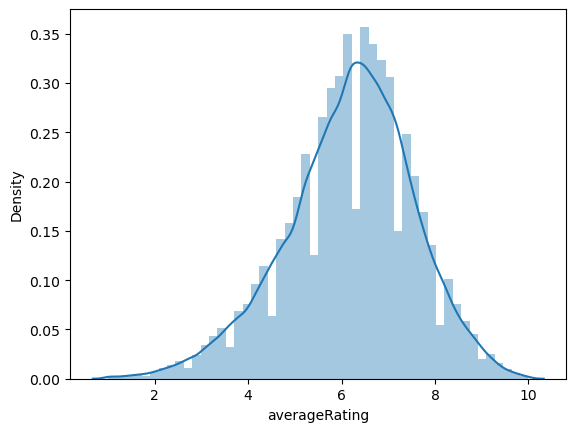

In [13]:
sns.distplot(imdb_ratings["averageRating"])

Se extrae una muestra

In [14]:
ids_quiero = imdb_ratings.tconst.values[
    (imdb_ratings.averageRating >= 8) & (imdb_ratings.numVotes >= 770)
]

In [15]:
ids_quiero.shape

(1844,)

In [54]:
keywords_df = pd.read_json("datos/imdb_example_keywords.json")

In [22]:
keywords_df

,idImdb,keywords,titulo
0,tt0006864,"[multiple storyline, babylon babylonia, paris ...",Intolerancia (1916)
1,tt0010323,"[somnambulist, expressionism, hypnosis, avant ...",El gabinete del Dr. Caligari (1920)
2,tt0012349,"[lucifer morningstar character, the little tra...",El chico (1921)
3,tt0012364,"[ghost story, ghost, salvation, alcoholic, tub...",La carreta fantasma (1921)
4,tt0013442,"[vampire, self sacrifice, bite mark, dracula, ...",Nosferatu (1922)
...,...,...,...
1497,tt8760684,"[apollo 11, neil armstrong, buzz aldrin, astro...",Apollo 11 (2019)
1498,tt9124428,"[horse, race, love, success, turkey, hope, can...",Bizim Için Sampiyon (2018)
1499,tt9135854,"[football, barcelona fc, reference to pep guar...","Take the ball, pass the ball (Toca y pasa el b..."
1500,tt9151704,"[korean boy band, pool party, testimonial, con...",Burn The Stage. The movie (2018)


In [23]:
keywords_df[keywords_df.titulo.str.lower().str.contains("batman")]

,idImdb,keywords,titulo
1007,tt0372784,"[social decay, well, deception, falling down a...",Batman Begins (2005)


In [24]:
keywords_df.keywords = keywords_df.keywords.map(lambda x: " ".join(x))

In [25]:
tf_keywords = TfidfVectorizer(analyzer="word", min_df=1).fit(keywords_df.keywords)

In [26]:
tfidf_matrix_keywords = tf_keywords.transform(keywords_df.keywords)

In [27]:
tfidf_matrix_keywords.shape

(1502, 16491)

In [28]:
cosine_similarity_keywords = cosine_similarity(tfidf_matrix_keywords, tfidf_matrix_keywords)

Función que recomienda película por palabra clave 

In [29]:
titles = keywords_df["titulo"]
indices = pd.Series(keywords_df.index, index=keywords_df["titulo"])

def keyword_recommendations(title):
    # Obtener el índice correspondiente al título de la película
    idx = indices.loc[title]
    
    # Obtener los puntajes de similitud de género de todas las películas
    sim_scores = list(enumerate(cosine_similarity_keywords[idx]))
    
    # Ordenar los puntajes de similitud en orden descendente
    sim_scores = sorted(sim_scores, key=lambda x: x[1], reverse=True)
    
    # Obtener los índices de las películas más similares (excluyendo la película de consulta)
    sim_scores = sim_scores[1:21]  # Excluyendo el índice 0, que es la propia película
    
    # Obtener los índices de las películas recomendadas
    movie_indices = [i[0] for i in sim_scores]
    
    # Devolver los títulos de las películas recomendadas
    return titles.iloc[movie_indices]


In [30]:
keyword_recommendations("Batman Begins (2005)").head(20)

1191    El caballero oscuro: La leyenda renace (2012)
1081                       El caballero oscuro (2008)
1365                                     Logan (2017)
1300                                The Raid 2 (2014)
1196                                    Origen (2010)
1401                  Vengadores: Infinity War (2018)
1203                                  Deadpool (2016)
1048                               Infiltrados (2006)
1197            Mad Max: Furia en la carretera (2015)
726                     Sospechosos habituales (1995)
652                        Uno de los nuestros (1990)
623                          Jungla de cristal (1988)
1114                            Los Vengadores (2012)
584                                 Terminator (1984)
1061                             V de Vendetta (2005)
410                                 El padrino (1972)
1025                             Casino Royale (2006)
1256                         Blade Runner 2049 (2017)
1260             X-Men: Días

# Ejercicio 2: Recomendador basado en filtrado colaborativo

Sistema de recomendaciones basado en filtrado colaborativo usando los datos de **last.fm**

Los datos los descargué del link que vimos en clase: http://ocelma.net/MusicRecommendationDataset/lastfm-360K.html

## **1. Introducción**

En este proyecto, se desarrollará un sistema de recomendaciones basado en filtrado colaborativo utilizando datos de Last.fm. El filtrado colaborativo es una técnica comúnmente utilizada en sistemas de recomendación, la cual se basa en la agregación de preferencias o comportamientos de múltiples usuarios para hacer recomendaciones a un usuario específico. Este enfoque es especialmente útil en la recomendación de contenido donde la interacción del usuario con los ítems (como música, películas, productos) puede ser capturada y analizada.

El objetivo principal es implementar un modelo de filtrado colaborativo, evaluarlo mediante un regresor, proporcionar ejemplos de recomendaciones para usuarios específicos y calcular e interpretar el error cuadrático medio (MSE) de las predicciones.



## **Importación de librerías**

Importamos las librerías necesarias para el análisis de datos, cálculo de similitudes y manipulación de matrices dispersas.


In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os

import pyspark
from pyspark import SparkConf, SparkContext

from pyspark.sql import SparkSession
from pyspark.sql.functions import col, count, mean, when, explode, lower, trim, regexp_replace
from pyspark.sql.functions import max as spark_max
from pyspark.ml.recommendation import ALS
from pyspark.ml.feature import StringIndexer
from pyspark.ml.evaluation import RegressionEvaluator



In [59]:
# Configuración del entorno
os.environ["JAVA_HOME"] = "C:\\Program Files\\Java\\jdk-22"
os.environ["SPARK_HOME"] = "C:\\SPARK"

In [60]:
# Crear una nueva configuración de Spark
conf = SparkConf() \
    .setAppName("MusicRecommendationSystem") \
    .set("spark.driver.memory", "4g") \
    .set("spark.executor.memory", "4g") \
    .set("spark.executor.cores", "2") \
    .set("spark.driver.maxResultSize", "2g") \
    .set("spark.network.timeout", "800s") \
    .set("spark.executor.heartbeatInterval", "200s") \
    .set("spark.python.worker.reuse", "true") \
    .set("spark.serializer", "org.apache.spark.serializer.KryoSerializer") \
    .set("spark.kryoserializer.buffer.max", "2000m") \
    .set("spark.rpc.message.maxSize", "256") \
    .set("spark.sql.execution.arrow.maxRecordsPerBatch", "1000")

In [61]:
# Iniciar una nueva sesión de Spark con la configuración actualizada
spark = SparkSession.builder.config(conf=conf).getOrCreate()

## **3.Carga y preparación de Datos**

Primero, cargamos el archivo `usersha1-artmbid-artname-plays.tsv`, proporcionado por Last.fm. Estos datos contienen información sobre las interacciones de los usuarios con diferentes artistas, incluyendo el número de reproducciones.


In [62]:
file_path = 'datos/lastfm-dataset-360K/usersha1-artmbid-artname-plays.tsv'
df = spark.read.csv(file_path, sep='\t', header=False, inferSchema=True)

# Renombrar las columnas
df = df.withColumnRenamed('_c0', 'user_id') \
       .withColumnRenamed('_c1', 'artist_id') \
       .withColumnRenamed('_c2', 'artist_name') \
       .withColumnRenamed('_c3', 'plays')

df.show(5)

+--------------------+--------------------+--------------------+------+
|             user_id|           artist_id|         artist_name| plays|
+--------------------+--------------------+--------------------+------+
|00000c289a1829a80...|3bd73256-3905-4f3...|     betty blowtorch|2137.0|
|00000c289a1829a80...|f2fb0ff0-5679-42e...|           die Ärzte|1099.0|
|00000c289a1829a80...|b3ae82c2-e60b-455...|   melissa etheridge| 897.0|
|00000c289a1829a80...|3d6bbeb7-f90e-4d1...|           elvenking| 717.0|
|00000c289a1829a80...|bbd2ffd7-17f4-450...|juliette & the licks| 706.0|
+--------------------+--------------------+--------------------+------+
only showing top 5 rows



Los datos consisten en cuatro columnas: user_id, artist_id, artist_name y plays, que representan el identificador del usuario, el identificador del artista y el número de reproducciones, respectivamente. 

## **4. Preprocesamiento de Datos**

**Filtrado de datos**

En este punto optaré por eliminar usuarios y artistas con pocas interacciones para que mis datos no tengan ruido y podamos garantizar la calidad de los datos.

In [63]:
# Filtrar usuarios con pocas interacciones
min_user_interactions = 20
user_interactions = df.groupBy("user_id").agg(count("plays").alias("interactions_user"))
active_users = user_interactions.filter(user_interactions.interactions_user >= min_user_interactions)
df = df.join(active_users, on="user_id", how="inner")

# Filtrar artistas con pocas interacciones
min_artist_interactions = 50
artist_interactions = df.groupBy("artist_id").agg(count("plays").alias("interactions_artist"))
popular_artists = artist_interactions.filter(artist_interactions.interactions_artist >= min_artist_interactions)
df = df.join(popular_artists, on="artist_id", how="inner")

df.show(5)


+--------------------+--------------------+-----------+-----+-----------------+-------------------+
|           artist_id|             user_id|artist_name|plays|interactions_user|interactions_artist|
+--------------------+--------------------+-----------+-----+-----------------+-------------------+
|0004537a-4b12-43e...|034ce4267aada1aba...| ultra naté|268.0|               50|                241|
|0004537a-4b12-43e...|14e36b8a721af57d0...| ultra naté| 67.0|               49|                241|
|0004537a-4b12-43e...|292eb685e88b5ed3f...| ultra naté| 64.0|               49|                241|
|0004537a-4b12-43e...|3774072a4ff69fe87...| ultra naté| 15.0|               46|                241|
|0004537a-4b12-43e...|38e885ddc8f8b7fd2...| ultra naté| 14.0|               57|                241|
+--------------------+--------------------+-----------+-----+-----------------+-------------------+
only showing top 5 rows



**Normalización de los datos**

Normalizamos las reproducciones de música para que los valores sean comparables entre diferentes usuarios.

In [64]:
# Calcular el valor máximo de reproducciones
max_plays = df.agg(spark_max("plays")).first()[0]

# Normalizar las reproducciones
df = df.withColumn("normalized_plays", col("plays") / max_plays)
df.show(5)


+--------------------+--------------------+-----------+-----+-----------------+-------------------+--------------------+
|           artist_id|             user_id|artist_name|plays|interactions_user|interactions_artist|    normalized_plays|
+--------------------+--------------------+-----------+-----+-----------------+-------------------+--------------------+
|0004537a-4b12-43e...|034ce4267aada1aba...| ultra naté|268.0|               50|                241|6.393785622093869E-4|
|0004537a-4b12-43e...|14e36b8a721af57d0...| ultra naté| 67.0|               49|                241|1.598446405523467...|
|0004537a-4b12-43e...|292eb685e88b5ed3f...| ultra naté| 64.0|               49|                241|1.526874178410476...|
|0004537a-4b12-43e...|3774072a4ff69fe87...| ultra naté| 15.0|               46|                241|3.578611355649554E-5|
|0004537a-4b12-43e...|38e885ddc8f8b7fd2...| ultra naté| 14.0|               57|                241|3.340037265272917E-5|
+--------------------+----------

In [65]:
# Normalizar los nombres de los artistas
df = df.withColumn("normalized_artist_name", lower(trim(regexp_replace(col("artist_name"), r'[^\w\s]', ''))))

In [66]:
# Mostrar algunas filas para verificar la normalización
df.select("artist_name", "normalized_artist_name").distinct().show(10, truncate=False)

+-------------------+----------------------+
|artist_name        |normalized_artist_name|
+-------------------+----------------------+
|jelena karleusa    |jelena karleusa       |
|jack mcmanus       |jack mcmanus          |
|leb i sol          |leb i sol             |
|ergs, the          |ergs the              |
|mccarthy           |mccarthy              |
|boney' nem         |boney nem             |
|boney nem          |boney nem             |
|consolidated       |consolidated          |
|riddle of steel    |riddle of steel       |
|kevin bloody wilson|kevin bloody wilson   |
+-------------------+----------------------+
only showing top 10 rows



**Codificaciones para que el modelo soporte el tipo de datos**

Convertiremos las columnas user_id y artist_id a tipos numéricos, usando la clase StringIndexer de pyspark.ml.feature. Este transformador asigna un índice numérico a cada valor único en una columna de cadena.

Esta codificación se realiza para poder instanciar los modelos de más adelante.


In [67]:
# Convertir user_id a numérico
user_indexer = StringIndexer(inputCol="user_id", outputCol="user_index")
df = user_indexer.fit(df).transform(df)

# Convertir artist_id a numérico
artist_indexer = StringIndexer(inputCol="artist_id", outputCol="artist_index")
df = artist_indexer.fit(df).transform(df)

df.show(5)

+--------------------+--------------------+-----------+-----+-----------------+-------------------+--------------------+----------------------+----------+------------+
|           artist_id|             user_id|artist_name|plays|interactions_user|interactions_artist|    normalized_plays|normalized_artist_name|user_index|artist_index|
+--------------------+--------------------+-----------+-----+-----------------+-------------------+--------------------+----------------------+----------+------------+
|0004537a-4b12-43e...|034ce4267aada1aba...| ultra naté|268.0|               50|                241|6.393785622093869E-4|             ultra nat|   63174.0|      9186.0|
|0004537a-4b12-43e...|14e36b8a721af57d0...| ultra naté| 67.0|               49|                241|1.598446405523467...|             ultra nat|  172789.0|      9186.0|
|0004537a-4b12-43e...|292eb685e88b5ed3f...| ultra naté| 64.0|               49|                241|1.526874178410476...|             ultra nat|   86926.0|      

**Verificación de valores nulos**

Nos aseguramos de que no haya valores nulos en las columnas user_index, artist_index y normalized_plays.

In [68]:
# Verificar si hay valores nulos
print("Valores nulos en el conjunto de datos:")
df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

# Eliminar filas con valores nulos
df = df.na.drop(subset=["user_index", "artist_index", "normalized_plays"])


Valores nulos en el conjunto de datos:
+---------+-------+-----------+-----+-----------------+-------------------+----------------+----------------------+----------+------------+
|artist_id|user_id|artist_name|plays|interactions_user|interactions_artist|normalized_plays|normalized_artist_name|user_index|artist_index|
+---------+-------+-----------+-----+-----------------+-------------------+----------------+----------------------+----------+------------+
|        0|      0|          0|    2|                0|                  0|               2|                     0|         0|           0|
+---------+-------+-----------+-----+-----------------+-------------------+----------------+----------------------+----------+------------+



**Verificación de tipos de datos**

In [69]:
print("Tipos de datos del dataframe:")
df.printSchema()

Tipos de datos del dataframe:
root
 |-- artist_id: string (nullable = true)
 |-- user_id: string (nullable = true)
 |-- artist_name: string (nullable = true)
 |-- plays: double (nullable = true)
 |-- interactions_user: long (nullable = false)
 |-- interactions_artist: long (nullable = false)
 |-- normalized_plays: double (nullable = true)
 |-- normalized_artist_name: string (nullable = true)
 |-- user_index: double (nullable = false)
 |-- artist_index: double (nullable = false)



## **5. División de los datos en entrenamiento y prueba**

Dividimos los datos en conjuntos de entrenamiento y prueba para evaluar nuestro modelo.



In [70]:
# Dividir los datos en conjuntos de entrenamiento y prueba
(train_data, test_data) = df.randomSplit([0.8, 0.2], seed=1234)

## **6. Creación del modelo de filtrado colaborativo**

Utilizamos el algoritmo Alternating Least Squares (ALS) para el filtrado colaborativo, una técnica comúnmente utilizada en sistemas de recomendación.

**Explicación teórica del ALS**

ALS es un algoritmo que se utiliza para completar matrices dispersas, lo que es ideal para sistemas de recomendación. Funciona alternando entre fijar los factores de usuario y actualizar los factores de ítem para minimizar el error cuadrático medio.

In [71]:
als = ALS(maxIter=10, 
          regParam=0.1, 
          userCol="user_index", 
          itemCol="artist_index", 
          ratingCol="normalized_plays", 
          coldStartStrategy="drop")

# Entrenar el modelo
try:
    model = als.fit(train_data)
    print("Modelo entrenado exitosamente.")
except Exception as e:
    print(f"Error al entrenar el modelo: {e}")

Modelo entrenado exitosamente.


## **7. Evaluación del modelo**

Evaluamos el rendimiento del modelo utilizando Root Mean Square Error (RMSE).

La métrica RMSE es útil para medir la diferencia entre los valores predichos por el modelo y los valores reales en la escala de la variable dependiente, en este caso, el número de reproducciones normalizadas.

In [72]:
# Hacer predicciones
predictions = model.transform(test_data)

# Evaluar el modelo
evaluator = RegressionEvaluator(metricName="rmse", labelCol="normalized_plays", predictionCol="prediction")
rmse = evaluator.evaluate(predictions)
print(f"Root-mean-square error = {rmse}")

Root-mean-square error = 0.0015499249699406183


Un valor de Root-mean-square error = 0.0015499249699406183 es indicativo de una diferencia mínima entre las predicciones del modelo y los valores reales; y en nuetsro caso, que sea bajo es lo deseable. Aquí ya hay que tener cuidado con sobreajustar... pero eso lo veremos adelante.


## **8. Generación de recomendaciones**

Finalmente, generamos recomendaciones para los usuarios.


In [73]:
# Generar recomendaciones para todos los usuarios
user_recommendations = model.recommendForAllUsers(10)
user_recommendations.show(5, truncate=False)

# Generar recomendaciones para todos los artistas
artist_recommendations = model.recommendForAllItems(10)
artist_recommendations.show(5, truncate=False)


+----------+--------------------------------------------------------------------------------------------------------------+
|user_index|recommendations                                                                                               |
+----------+--------------------------------------------------------------------------------------------------------------+
|31        |[{99, 0.0}, {98, 0.0}, {97, 0.0}, {96, 0.0}, {95, 0.0}, {94, 0.0}, {93, 0.0}, {92, 0.0}, {91, 0.0}, {90, 0.0}]|
|53        |[{99, 0.0}, {98, 0.0}, {97, 0.0}, {96, 0.0}, {95, 0.0}, {94, 0.0}, {93, 0.0}, {92, 0.0}, {91, 0.0}, {90, 0.0}]|
|65        |[{99, 0.0}, {98, 0.0}, {97, 0.0}, {96, 0.0}, {95, 0.0}, {94, 0.0}, {93, 0.0}, {92, 0.0}, {91, 0.0}, {90, 0.0}]|
|78        |[{99, 0.0}, {98, 0.0}, {97, 0.0}, {96, 0.0}, {95, 0.0}, {94, 0.0}, {93, 0.0}, {92, 0.0}, {91, 0.0}, {90, 0.0}]|
|85        |[{99, 0.0}, {98, 0.0}, {97, 0.0}, {96, 0.0}, {95, 0.0}, {94, 0.0}, {93, 0.0}, {92, 0.0}, {91, 0.0}, {90, 0.0}]|
+-------

## **9. Análisis del sistema de recomendación**

**Selección de un usuario**

Primero, seleccionamos un usuario con una cantidad considerable de interacciones para analizar las recomendaciones.

In [74]:
# Seleccionar un usuario para el análisis
user_id_for_analysis = df.select("user_id").distinct().limit(1).collect()[0][0]

print(f"Analizando recomendaciones para el usuario: {user_id_for_analysis}")


Analizando recomendaciones para el usuario: 034ce4267aada1ababad044526fd58e22e899e6b


**Obtenemos las interacciones reales del usuario**

Obtenemos las interacciones reales del usuario seleccionado, es decir, los artistas que ha reproducido y el número de reproducciones.

In [75]:
# Interacciones reales del usuario
user_interactions = df.filter(df.user_id == user_id_for_analysis).select("artist_name", "plays").orderBy(col("plays").desc())
user_interactions.show(10, truncate=False)


+----------------+------+
|artist_name     |plays |
+----------------+------+
|depeche mode    |2579.0|
|pet shop boys   |2123.0|
|goldfrapp       |1880.0|
|saint etienne   |1369.0|
|boards of canada|1257.0|
|erasure         |1171.0|
|kylie minogue   |1152.0|
|new order       |1144.0|
|cut copy        |1100.0|
|trentemøller    |1073.0|
+----------------+------+
only showing top 10 rows



**Obtenemos las recomendaciones para el usuario**

Usamos el modelo para generar recomendaciones para el usuario seleccionado.

In [76]:
# Obtener el índice del usuario
user_index = df.filter(df.user_id == user_id_for_analysis).select("user_index").distinct().collect()[0][0]

# Generar recomendaciones para el usuario
recommendations = model.recommendForUserSubset(df.filter(df.user_id == user_id_for_analysis).select("user_index").distinct(), 10)

# Explorar la estructura de las recomendaciones para asegurarse de que se obtiene correctamente
recommendations.show(truncate=False)


+----------+--------------------------------------------------------------------------------------------------------------+
|user_index|recommendations                                                                                               |
+----------+--------------------------------------------------------------------------------------------------------------+
|63174     |[{99, 0.0}, {98, 0.0}, {97, 0.0}, {96, 0.0}, {95, 0.0}, {94, 0.0}, {93, 0.0}, {92, 0.0}, {91, 0.0}, {90, 0.0}]|
+----------+--------------------------------------------------------------------------------------------------------------+



Estos índices de artistas recomendados corresponden a artistas que el usuario podría potencialmente disfrutar, basados en las interacciones de otros usuarios con gustos similares.

In [77]:
recommendations.printSchema()

root
 |-- user_index: integer (nullable = false)
 |-- recommendations: array (nullable = true)
 |    |-- element: struct (containsNull = true)
 |    |    |-- artist_index: integer (nullable = true)
 |    |    |-- rating: float (nullable = true)



Recuperemos los nombres: pasemos de índices a nombres de los artistas

In [78]:
# Mapa de índices de artistas a nombres de artistas
artist_dict = df.select("artist_index", "artist_name").distinct().rdd.collectAsMap()

In [79]:
# Explode the recommendations to flatten the structure
recommendations = recommendations.withColumn("rec_exp", explode("recommendations"))

In [80]:
# Unir las recomendaciones con el DataFrame original para obtener los nombres de los artistas
recommendations = recommendations.join(df.select("artist_index", "artist_name").distinct(), recommendations.rec_exp.artist_index == df.artist_index, "inner")
recommendations = recommendations.select("user_index", "rec_exp.artist_index", "artist_name")

In [81]:
# Filtrar las recomendaciones para el usuario específico
user_recommendations = recommendations.filter(recommendations.user_index == user_index)

# Colectar los nombres de los artistas recomendados
recommended_artist_names = [row.artist_name for row in user_recommendations.select("artist_name").collect()]

**Análisis comparativo**

Comparamos las interacciones reales del usuario con las recomendaciones del sistema. Basicamente tomaremos las consultas anteriores, pero las que nos interesa para comparar.



Veámos las interacciones reales del usuario, es decir, los artistas que ha reproducido y el número de reproducciones.

+----------------+------+
|artist_name     |plays |
+----------------+------+
|depeche mode    |2579.0|
|pet shop boys   |2123.0|
|goldfrapp       |1880.0|
|saint etienne   |1369.0|
|boards of canada|1257.0|
|erasure         |1171.0|
|kylie minogue   |1152.0|
|new order       |1144.0|
|cut copy        |1100.0|
|trentemøller    |1073.0|
+----------------+------+
only showing top 10 rows



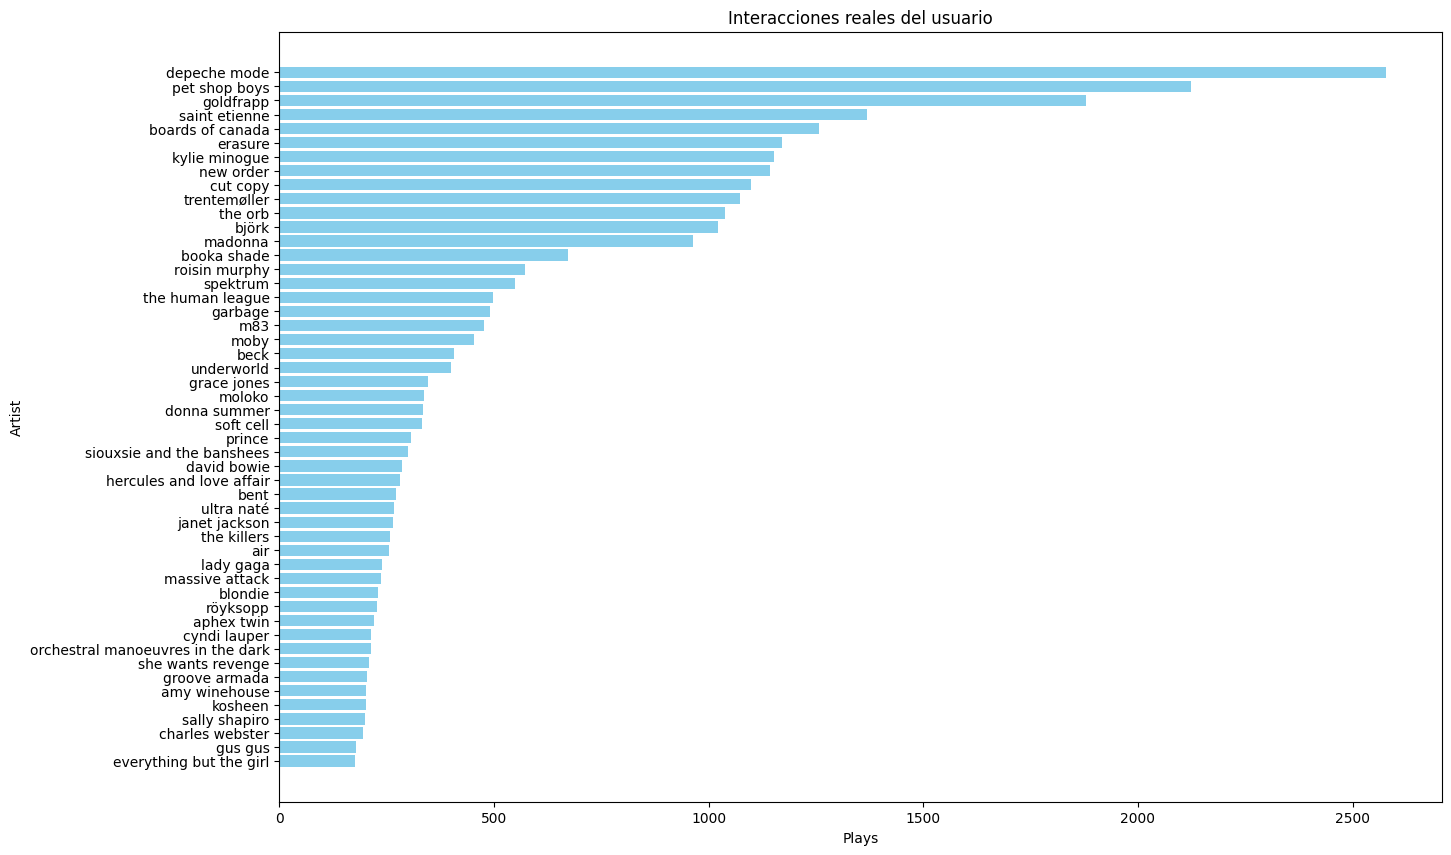

In [82]:
# Interacciones reales del usuario
user_interactions.show(10, truncate=False)

user_interactions_pd = user_interactions.toPandas()

plt.figure(figsize=(15, 10))
plt.barh(user_interactions_pd['artist_name'], user_interactions_pd['plays'], color='skyblue')
plt.xlabel('Plays')
plt.ylabel('Artist')
plt.title('Interacciones reales del usuario')
plt.gca().invert_yaxis()
plt.show()



Recolectamos los artistas recomendados por el modelo

In [83]:
# Artistas recomendados por el sistema
print(f"Artistas recomendados: {recommended_artist_names}")


Artistas recomendados: ['black sabbath', 'jimiy hendrix', 'timi hendrix', 'jimi hendrix', 'cat power', 'jones, norah', 'nowa jones', 'norah jones', 'beirut', 'paramore', 'feist', 'avril lavigne', 'evril lavigne', 'avril lavignme', 'avril lavicne', 'elliott smith', 'elliotte smith', 'boards of canada']


Claramente los nombres de los artistas tienen erratas. Limpiemos un poco, con regex, para el análisis

In [84]:
recommended_artists_df = pd.DataFrame(recommended_artist_names, columns=['artist_name'])

recommended_artists_df['artist_name'] = recommended_artists_df['artist_name'].replace({
    r'jim[iy]{2} hendrix|timi hendrix': 'jimi hendrix',
    r'jones, norah|nowa jones': 'norah jones',
    r'evril lavigne|avril lavignm?e|avril lavicne': 'avril lavigne',
    r'elliotte smith': 'elliott smith'
}, regex=True)

recommended_artists_df = recommended_artists_df.drop_duplicates().reset_index(drop=True)
recommended_artists_df

,artist_name
0,black sabbath
1,jimi hendrix
2,cat power
3,norah jones
4,beirut
5,paramore
6,feist
7,avril lavigne
8,elliott smith
9,boards of canada


Identifiquemos los artistas que están en ambas listas, las interacciones reales y las recomendaciones.

In [85]:
common_artists = recommended_artists_df.merge(user_interactions_pd, on='artist_name')
common_artists

,artist_name,plays
0,boards of canada,1257.0


En este caso, el sistema de recomendación acertó al sugerir "boards of canada", un artista que el usuario ya ha escuchado y que tiene un número considerable de reproducciones (1257.0 plays). Esto valida la efectividad del modelo al capturar y recomendar correctamente las preferencias del usuario.

Identifiquemos ahora los artistas que fueron recomendados por el sistema pero que el usuario no había escuchado anteriormente.

In [86]:
# Artistas recomendados que no estaban en las interacciones reales
new_recommendations = recommended_artists_df[~recommended_artists_df['artist_name'].isin(user_interactions_pd['artist_name'])]
new_recommendations

,artist_name
0,black sabbath
1,jimi hendrix
2,cat power
3,norah jones
4,beirut
5,paramore
6,feist
7,avril lavigne
8,elliott smith


**Conclusiones**

El análisis de las recomendaciones específicas para el usuario seleccionado muestra que el modelo ALS ha sido efectivo en identificar al menos un artista ("boards of canada") que el usuario ya disfruta, indicando la precisión del modelo en la personalización de las recomendaciones. Además, la lista de nuevos artistas recomendados ofrece oportunidades para que el usuario descubra nueva música basada en sus gustos actuales y las tendencias de otros usuarios similares.

Este análisis también sugiere que una mayor validación con otros usuarios y una evaluación continua de las recomendaciones puede ayudar a mejorar y ajustar el modelo para un mejor rendimiento y personalización.

**Mejoras: Trabajo futuro**

La salida de los artistas recomendados para el usuario seleccionado mostro una gran desnormalizacion de los nombres de los artistas. Esto suele pasar mucho el proyectos de BigData (me pasó igual en la practica de Spark) allí lo suyo es generar un preprocesamiento más robusto para tratar de pillar y normalizar la mayor cantidad de datos posible, de modo que el string indexer codifique sin duplicados, y así las predicciones puedan ser más finas. 

la primera mejora que propongo es de preprocesamiento y no de afinación directa de hiperparámetros por el principio de todo data sicentist: Garbage in, garbage out. 

Ahora, como segunda opción de mejora propongo explorar todas las estrategias que conocemos: Validación cruzada y optimización de hiperparámetros, con Grid Search o Random Search.

También sería muy interesante poder incluir características adicionales de los artistas (géneros, años de actividad, etc.) porque de acuerdo a lo que estuve leyendo, esto mejora enormemente las recomendaciones y la personalización. 

Por último, el mencionado en clase: Feedback explícito e implicito. Calificaciones directas o, para el caso implicito, clics, tiempo de escucha, podrían proporcionar muuucha info sobre cada usuario y esto sin duda ayudaria a generar una personalización brutal. Pero claro, esto ya es una mejora que debe estar soportada por alguna plataforma que guarde esta info.. hasta donde supe, Netflix hace esto de guardar no solo el historial de reproducción sino tambien las pausas, avances y retrocesos. 



In [87]:
spark.stop()